In [1]:
#khai báo các thư viện
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from scipy.stats import kurtosis
from matplotlib import pyplot as plt

In [2]:
# lấy dữ liệu
df = pd.read_fwf("https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/babies.txt")
df

,bwt,smoke
0,120.0,0.0
1,113.0,0.0
2,128.0,1.0
3,123.0,0.0
4,108.0,1.0
...,...,...
1232,128.0,0.0
1233,130.0,1.0
1234,125.0,0.0
1235,117.0,0.0


2. Biểu diễn hình học của dữ liệu

1. Dữ liệu cân nặng của trẻ trong trường hợp bà mẹ hút thuốc và bà mẹ không hút thuốc 
Ta sẽ phân tích các biểu đồ:
Histogram và Boxplot

a. Histogram và Boxplot trong trường hợp bà mẹ có hút thuốc:

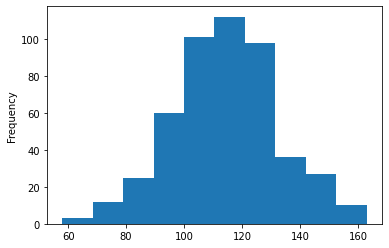

In [9]:
df.loc[(df.smoke== 1),'bwt'].plot.hist()
#vẽ biểu đồ histogram của cột 'bwt' chỉ với các dòng trong DataFrame 'df' mà giá trị của cột 'smoke' là 1.

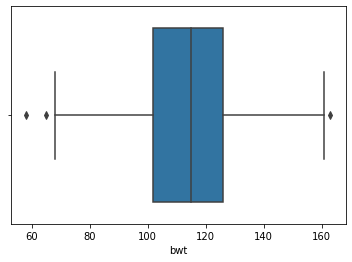

In [10]:
sns.boxplot(x='bwt', data = df.loc[(df.smoke== 1)])
#vẽ biểu đồ boxplot của cột 'bwt' cho nhóm người hút thuốc (những hàng trong DataFrame 'df' mà có giá trị 'smoke' là 1).

b. Histogram và Boxplot trong trường hợp bà mẹ không hút thuốc:

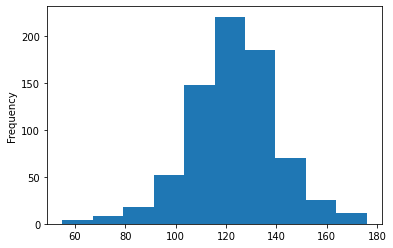

In [11]:
df.loc[(df.smoke== 0),'bwt'].plot.hist()
#vẽ biểu đồ histogram của cột 'bwt' chỉ với các dòng trong DataFrame 'df' mà giá trị của cột 'smoke' là 0. 

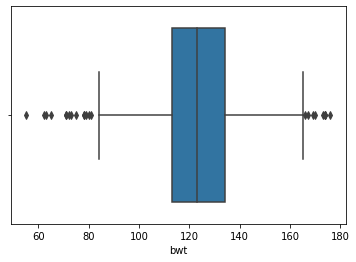

In [12]:
sns.boxplot(x='bwt', data = df.loc[(df.smoke== 0)])
#vẽ biểu đồ boxplot của cột 'bwt' cho nhóm người không hút thuốc (những hàng trong DataFrame 'df' mà có giá trị 'smoke' là 0)

2. Dữ liệu cân nặng của trẻ trong trường hợp bà mẹ hút thuốc không hút thuốc

a. Histogram

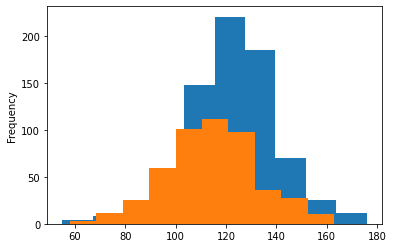

In [13]:
df.loc[(df.smoke== 0),'bwt'].plot.hist()
df.loc[(df.smoke== 1),'bwt'].plot.hist()
#so sánh phân phối của cột 'bwt' giữa hai nhóm người khác nhau: nhóm không hút thuốc (smoke == 0) và nhóm hút thuốc (smoke == 1).

b. Boxplot

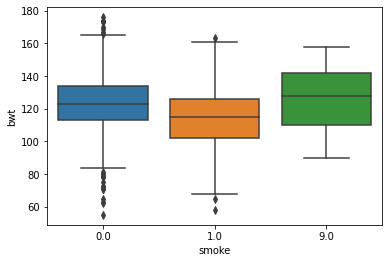

In [14]:
sns.boxplot(x='smoke', y='bwt',data= df)
#sự khác biệt về phân phối của cột 'bwt' giữa hai nhóm dựa trên giá trị của cột 'smoke'.

**So sánh QQ-plot phân bố của 2 tập dữ liệu:**

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


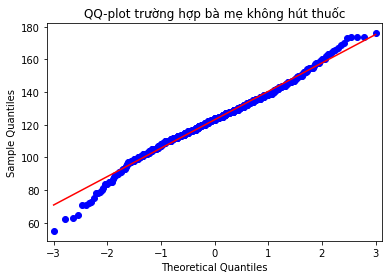

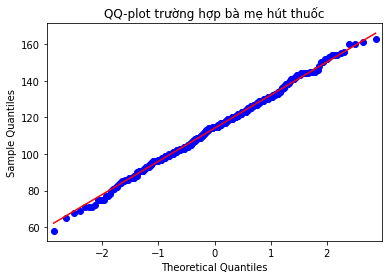

In [15]:
import statsmodels.api as sm
import scipy.stats as stats
sm.qqplot(df.loc[(df.smoke== 0),'bwt'], line="s")
plt.title('QQ-plot trường hợp bà mẹ không hút thuốc')
plt.show()
sm.qqplot(df.loc[(df.smoke== 1),'bwt'],line="s")
plt.title('QQ-plot trường hợp bà mẹ hút thuốc')
plt.show()
#Đồ thị QQ-plot được sử dụng để đánh giá mối quan hệ giữa phân phối của dữ liệu và phân phối chuẩn. Nếu các điểm trên đồ thị gần với đường thẳng chuẩn (line="s"), cho thấy dữ liệu có thể tuân theo phân phối chuẩn. 